In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('income.csv')

In [24]:
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [25]:
df.head(1)

,Name,Age,Income
0,Rob,27,70000


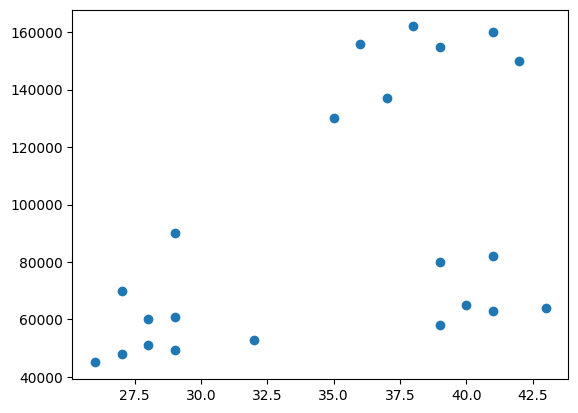

In [26]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Income'])

In [27]:
from sklearn.cluster import KMeans
# model =KMeans()
model =KMeans(n_clusters=3)

In [28]:
model

KMeans(n_clusters=3)

In [29]:
y_pred = model.fit_predict(df[['Age', 'Income']])

In [30]:
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [31]:
df['cluster']= y_pred

In [32]:
df

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [33]:
model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [34]:
lmc=df[df.cluster==0]
mc=df[df.cluster==1]
uc=df[df.cluster==2]
# df3=df[df.cluster==3]
# df4=df[df.cluster==4]
# df5=df[df.cluster==5]
# df6=df[df.cluster==6]
# df7=df[df.cluster==7]

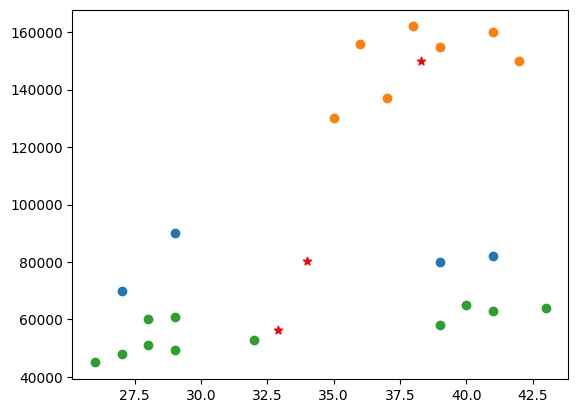

In [35]:
plt.scatter(lmc.Age, lmc.Income)
plt.scatter(mc.Age, mc.Income)
plt.scatter(uc.Age, uc.Income)
# plt.scatter(df3.Age, df3.Income)
# plt.scatter(df4.Age, df4.Income)
# plt.scatter(df5.Age, df5.Income)
# plt.scatter(df6.Age, df6.Income)
# plt.scatter(df7.Age, df7.Income)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='r', marker='*')

In [36]:
sse = []
sse_r = range(1,10)
for i in sse_r:
    km = KMeans(n_clusters = i)
    km.fit_predict(df[['Age' , 'Income']])
    sse.append(km.inertia_)

In [38]:
sse

[39748148458.54546,
 3318233941.161905,
 1606229737.6785712,
 843929723.0500001,
 296500418.0952381,
 239800409.1666667,
 183300332.36666667,
 157800323.62857142,
 106383578.86666666]

Text(0, 0.5, 'SSE')

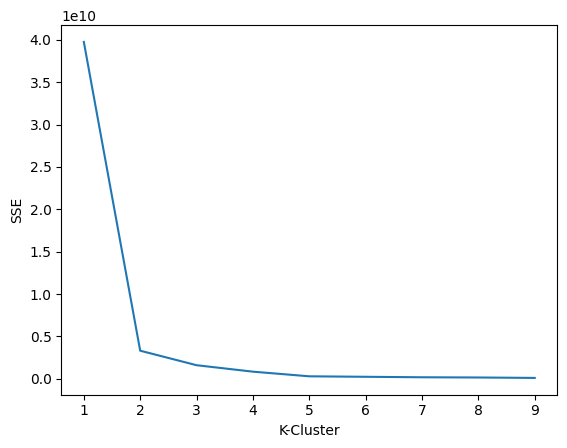

In [39]:
plt.plot(sse_r,sse)
plt.xlabel('K-Cluster')
plt.ylabel('SSE')